In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
# Define gradient descent function for linear regression
def gradient_descent(X, y, learning_rate, n_iterations):
    n = len(y)
    theta = np.array([[0],[0]])  # initialization
    history = np.zeros((n_iterations, 2))  # to store theta values over iterations
    losses = np.zeros(n_iterations)  # to store loss values over iterations
    
    for iteration in range(n_iterations):
        gradients = 2/n * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        history[iteration] = theta.flatten()
        
        # Calculate loss (Mean Squared Error)
        y_pred = X.dot(theta)
        losses[iteration] = np.mean((y_pred - y) ** 2)
    
    return theta, history, losses

In [5]:
# Run gradient descent
theta, history, losses = gradient_descent(X_b, y, 0.1, 50)

In [6]:
# Print the parameters
print("Intercept:", theta[0][0])
print("Coefficient:", theta[1][0])

Intercept: 4.049099663192346
Coefficient: 3.1220211733717584


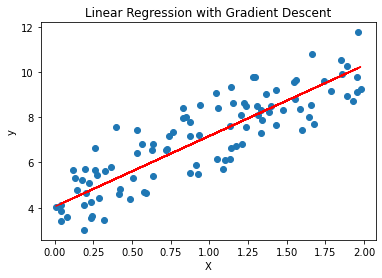

In [7]:
# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()

No handles with labels found to put in legend.


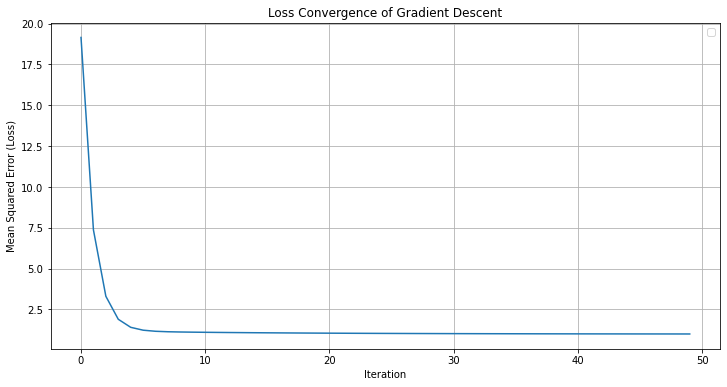

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss Convergence of Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Function to run gradient descent for different learning rates
def run_gradient_descent_with_learning_rates(X, y, learning_rates, n_iterations=10):
    results = []
    for lr in learning_rates:
        theta, history, losses = gradient_descent(X, y, learning_rate=lr, n_iterations=n_iterations)
        results.append((lr, theta, history, losses))
    return results

In [10]:
# Plot the convergence of gradient descent with varying learning rates
def plot_convergence(learning_rates, histories, losses):
    plt.figure(figsize=(12, 6))
    for lr, history, loss in zip(learning_rates, histories, losses):
        plt.plot(np.arange(len(loss)), loss, label=f'lr={lr}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.title('Loss Convergence of Gradient Descent with Varying Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
# Define learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.46, 0.49]

In [12]:
# Run gradient descent for different learning rates
results = run_gradient_descent_with_learning_rates(X_b, y, learning_rates)

In [13]:
# Extract histories and losses for plotting
histories = [result[2] for result in results]
losses = [result[3] for result in results]

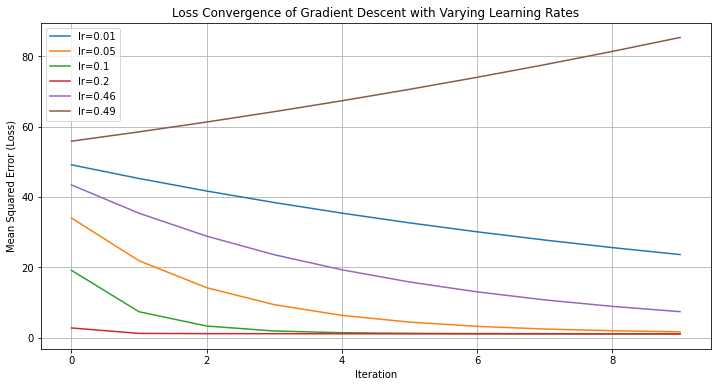

In [14]:
# Plot convergence
plot_convergence(learning_rates, histories, losses)